![logo](https://s3.eu-central-1.amazonaws.com/camo-bucket/logo_small.svg)

In [1]:
import io
import os
import urllib.request

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
from supersight import Dashboard, Plots_gatherer

# 1. Create a collection of plots
The main goal of supersight is to gather your plots and organize these plots within a mini web site.
Actually, you can embed any svg plots but this tool was designed to work with MatPlotlib.  

We start by creating a plots gatherer object.  
It will contain our plots for easy retrieval:

In [3]:
plots = Plots_gatherer()

Let's generate a simple plot :

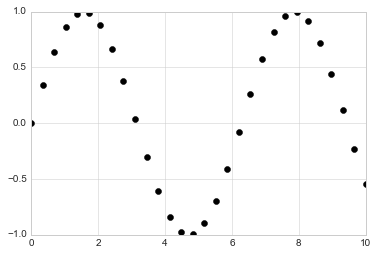

In [4]:
graph = plt.figure()
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o', color='black');

buf = io.BytesIO()
plt.savefig(buf, format='svg')
plots.add_plot("first graph", buf)

Once your are happy with it, supersight requires you to save your plot in  BytesIO objects.  
SVG format is advised since it is lightweight and vector-based.  
The three last lines are required to save your plot in a way supersight can handle.

We will make a new plot :

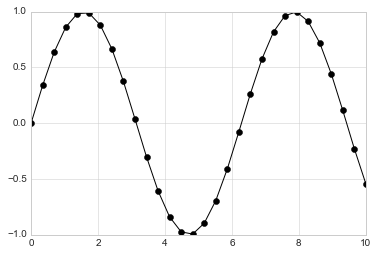

In [5]:
graph = plt.figure()
plt.plot(x, y, '-ok')

buf = io.BytesIO()
plt.savefig(buf, format='svg')
plots.add_plot("second graph", buf)

And a third graph for the example :

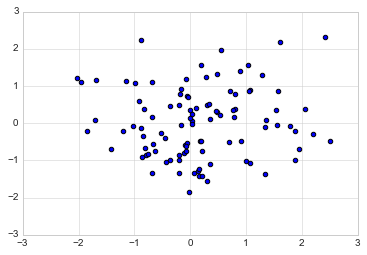

In [6]:
graph = plt.figure()
plt.scatter(np.random.randn(100), np.random.randn(100));

buf = io.BytesIO()
plt.savefig(buf, format='svg')
plots.add_plot("third graph", buf)

Below is a hack to load external svg in our mini site :

In [7]:
logo = open("logo_small.svg", "rb")
logo_buf = io.BytesIO(logo.read())
plots.add_plot("logo", logo_buf)
logo.close()

Let's add some pandas dataframes as SuperSight can also display data tables within pages :

In [8]:
data=pd.read_csv("https://s3.eu-central-1.amazonaws.com/camo-bucket/misc_to_link/data_sample.csv")

In [9]:
df1 = data.head() # a classic df

In [10]:
# a simple pivot table
df2 = pd.pivot_table(data, index = 'Gender',
                     columns = ['Smoking'],
                     aggfunc = np.average)

# 2. Create a dashboard
Once your plots are saved in BytesIO objects you can start making a dashboard by initiating a Dashboard object :  


In [11]:
ds = Dashboard()

By default, the mini site comes with a home page. We will add two sections. The first section will contain only one page and the second will contain two pages.  
**As a convention a single-page section is composed of a page named "Page 1".**

In [12]:
ds.add_section("Section 1")
# We just created a section named Section 1. Pick a custom name that describe an underlying idea of your plots.
ds.sections["Section 1"].add_page("Page 1")


ds.add_section("Section 2")
# We just created a section named Section 2. We said we wanted two pages in this section :
ds.sections["Section 2"].add_page("Interesting Page")
ds.sections["Section 2"].add_page("Great Page") # name it as you want !

Each page is organised following a classic Bootstrap grid. Users can display elements on this grid. The default grid is `[(6, 6), (6, 6), (6, 6)]`. It means the page displays three rows with two elements on each row.  
Of course, this layout can be overridden. For the Home page we will display the supersight logo.  
According to the Bootstrap grid system the layout for a single row and a single element is `[(12,)]`.

In [13]:
ds.sections["Home"].pages["Home"].layout = [(12,)]

In [14]:
ds.sections["Home"].pages["Home"].add_element(name = "logo", plot_object = plots.get_plot("logo"))


In section 1, the default grid can stay (hence six plots). Users can populate the grid with their plots. This process populate the grid from left to right and from top to bottom :

In [15]:
ds.sections["Section 1"].pages["Page 1"].add_element(name = "plot 1", plot_object = plots.get_plot("first graph"))
ds.sections["Section 1"].pages["Page 1"].add_element(name = "plot 2", plot_object = plots.get_plot("first graph"))

ds.sections["Section 1"].pages["Page 1"].add_element(name = "plot 3", plot_object = plots.get_plot("second graph"))
ds.sections["Section 1"].pages["Page 1"].add_element(name = "plot 4", plot_object = plots.get_plot("second graph"))

ds.sections["Section 1"].pages["Page 1"].add_element(name = "plot 5", plot_object = plots.get_plot("third graph"))
ds.sections["Section 1"].pages["Page 1"].add_element(name = "plot 6", plot_object = plots.get_plot("third graph"))
# add comments :
ds.sections["Section 1"].pages["Page 1"].elements["plot 3"].add_comment_below("This plot will convince you !")

Users can also use MathJax to dsiplay equations in comments :

In [16]:
ds.sections["Section 1"].pages["Page 1"].elements["plot 6"].add_comment_below("""This one is not bad either ! <br>
You can also use MathJax : $x = {-b \pm \sqrt{b^2-4ac} \over 2a}.$""")

Now we can try to vary the layout. For instance on the first row we will display a plot two third the width.  
On the second row we can display a unique plot with a heading.  
And then three small plots on the last row.

In [17]:
ds.sections["Section 2"].pages["Interesting Page"].layout = [(8, 4), (12,), (4, 4, 4)]

ds.sections["Section 2"].pages["Interesting Page"].add_element(name = "plot 1", plot_object = plots.get_plot("third graph"), heading = None)
ds.sections["Section 2"].pages["Interesting Page"].add_element(name = "plot 2", plot_object = plots.get_plot("first graph"), heading = None)

ds.sections["Section 2"].pages["Interesting Page"].add_element(name = "plot 3", plot_object = plots.get_plot("second graph"), heading = "Interesting Heading")

ds.sections["Section 2"].pages["Interesting Page"].add_element(name = "plot 4", plot_object = plots.get_plot("third graph"), heading = None)
ds.sections["Section 2"].pages["Interesting Page"].add_element(name = "plot 5", plot_object = plots.get_plot("third graph"), heading = None)
ds.sections["Section 2"].pages["Interesting Page"].add_element(name = "plot 6", plot_object = plots.get_plot("third graph"), heading = None)

In [18]:
dummy ="""One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a 
horrible vermin. He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, 
slightly domed and divided by arches into stiff sections. The bedding was hardly able to cover it and seemed ready 
to slide off any moment. His many legs, pitifully thin compared with the size of the rest of him, waved about 
helplessly as he looked. "What's happened to me?" he thought. It wasn't a dream. His room, a proper human room 
although a little too small, lay peacefully between its four familiar walls. A collection of textile samples 
lay spread out on the table - Samsa was a travelling salesman - 
and above it there hung a picture that he had recently cut out of an illustrated magazine and housed"""

In [19]:
ds.sections["Section 2"].pages["Interesting Page"].elements["plot 1"].add_comment_above(dummy)
ds.sections["Section 2"].pages["Interesting Page"].elements["plot 2"].add_comment_below(dummy[:277])

To finish, we can display text and tables on the "great page" !

In [20]:
ds.sections["Section 2"].pages["Great Page"].layout = [(8, 4), (6,6), (12,), (12,)]
ds.sections["Section 2"].pages["Great Page"].add_element(name = "info", heading = "Contact Information", 
                                                         comment_below = "camille.moatti@gmail.com <br> +33 (0) 6 78 93 19 66", 
                                                         comment_above = "<br>Camille Moatti")
ds.sections["Section 2"].pages["Great Page"].add_element(name = "text", plot_object = plots.get_plot("logo"))

In [21]:
ds.sections["Section 2"].pages["Great Page"].add_element(name = "small table")
ds.sections["Section 2"].pages["Great Page"].elements["small table"].add_table(df1)

In [22]:
ds.sections["Section 2"].pages["Great Page"].add_element(name = "small table 2")
ds.sections["Section 2"].pages["Great Page"].elements["small table 2"].add_table(df1)

In [23]:
ds.sections["Section 2"].pages["Great Page"].add_element(name = "small table 3")
ds.sections["Section 2"].pages["Great Page"].elements["small table 3"].add_table(df1)

In [24]:
ds.sections["Section 2"].pages["Great Page"].add_element(name = "pivot table")
ds.sections["Section 2"].pages["Great Page"].elements["pivot table"].add_table(df2)

In [25]:
df2

Age                   BMI            Cholesterol              \
Smoking       No        Yes         No        Yes          No         Yes   
Gender                                                                      
Female   56.2500  58.910811  26.872642  26.370270  223.929245  227.286486   
Male     58.3125  58.131429  27.043056  26.428571  227.425000  214.548571   

         SystolicBP              
Smoking          No         Yes  
Gender                           
Female   143.933962  147.845946  
Male     146.022222  146.785714

In [26]:
ds.render()

bootstrap-grid.css
bootstrap-grid.css.map
bootstrap-grid.min.css
bootstrap-grid.min.css.map
bootstrap-reboot.css
bootstrap-reboot.css.map
bootstrap-reboot.min.css
bootstrap-reboot.min.css.map
bootstrap.css
bootstrap.css.map
bootstrap.min.css
bootstrap.min.css.map
jumbotron.css
.DS_Store
bootstrap.js
bootstrap.min.js
Home Home logo
Starting individual page : Section 1 Page 1
Section 1 Page 1 plot 1
Section 1 Page 1 plot 2
Section 1 Page 1 plot 3
Section 1 Page 1 plot 4
Section 1 Page 1 plot 5
Section 1 Page 1 plot 6
Starting individual page : Section 2 Interesting Page
Section 2 Interesting Page plot 1
Section 2 Interesting Page plot 2
Section 2 Interesting Page plot 3
Section 2 Interesting Page plot 4
Section 2 Interesting Page plot 5
Section 2 Interesting Page plot 6
Starting individual page : Section 2 Great Page
Section 2 Great Page info
Section 2 Great Page text
Section 2 Great Page small table
Section 2 Great Page small table 2
Section 2 Great Page small table 3
Section 2 Great Pa

# 3. Customize the default template

SuperSight comes with the possibility to easily hack the default template. I let a plain vanilla Bootstrap 4 template because a lot are already familiar with this framework.  
The easier way to get started is to copy the default template from the module.

In [27]:
# Here the complete folder 'customized_template' is in the current directory :
ds.render(template='customized_template')

bootstrap-grid.css
bootstrap-grid.css.map
bootstrap-grid.min.css
bootstrap-grid.min.css.map
bootstrap-reboot.css
bootstrap-reboot.css.map
bootstrap-reboot.min.css
bootstrap-reboot.min.css.map
bootstrap.css
bootstrap.css.map
bootstrap.min.css
bootstrap.min.css.map
jumbotron.css
.DS_Store
bootstrap.js
bootstrap.min.js
Home Home logo
Starting individual page : Section 1 Page 1
Section 1 Page 1 plot 1
Section 1 Page 1 plot 2
Section 1 Page 1 plot 3
Section 1 Page 1 plot 4
Section 1 Page 1 plot 5
Section 1 Page 1 plot 6
Starting individual page : Section 2 Interesting Page
Section 2 Interesting Page plot 1
Section 2 Interesting Page plot 2
Section 2 Interesting Page plot 3
Section 2 Interesting Page plot 4
Section 2 Interesting Page plot 5
Section 2 Interesting Page plot 6
Starting individual page : Section 2 Great Page
Section 2 Great Page info
Section 2 Great Page text
Section 2 Great Page small table
Section 2 Great Page small table 2
Section 2 Great Page small table 3
Section 2 Great Pa